In [503]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [504]:
create_experiment_snapshots([25, 50, 75, 100])

In [505]:
evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)

STATS BEFORE MTD OPERATION
Current Attack: SCAN_HOST
MTD Frequency: 0
Compromised Number: 0
MTD: IPShuffle triggered 0.0s
MTD: Interrupted SCAN_PORT at 110.5s!
STATS BEFORE MTD OPERATION
Current Attack: BRUTE_FORCE
MTD Frequency: 0.009053685640985952
Compromised Number: 0
MTD: IPShuffle triggered 200.8s
MTD: Interrupted EXPLOIT_VULN at 313.8s!
STATS BEFORE MTD OPERATION
Current Attack: SCAN_PORT
MTD Frequency: 0.006372841994285872
Compromised Number: 0
MTD: ServiceDiversity triggered 401.1s
STATS BEFORE MTD OPERATION
Current Attack: SCAN_PORT
MTD Frequency: 0.006342836880798282
Compromised Number: 1
MTD: CompleteTopologyShuffle triggered 601.2s
MTD: Interrupted EXPLOIT_VULN at 721.3s!
STATS BEFORE MTD OPERATION
Current Attack: EXPLOIT_VULN
MTD Frequency: 0.005545837140452651
Compromised Number: 2
MTD: IPShuffle triggered 802.1s
MTD: Interrupted EXPLOIT_VULN at 912.3s!
STATS BEFORE MTD OPERATION
Current Attack: ENUM_HOST
MTD Frequency: 0.005480740511187955
Compromised Number: 2
MTD: Ser

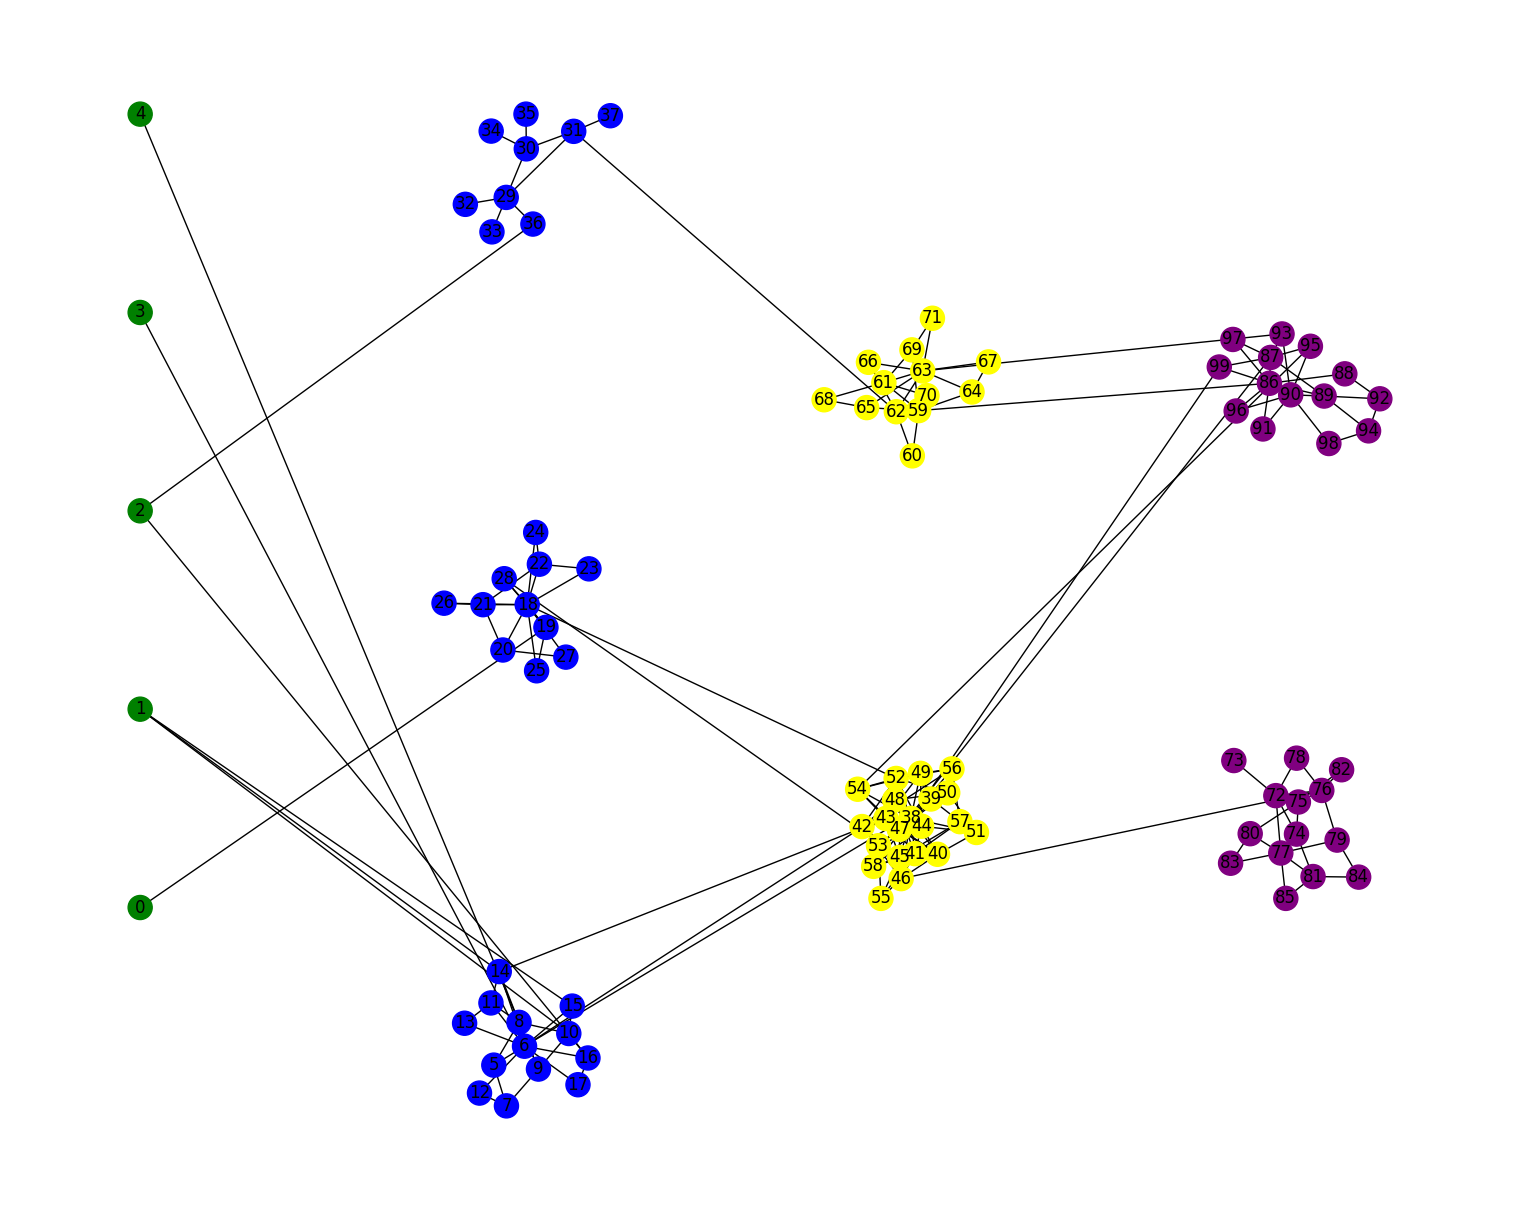

In [506]:
evaluation.get_network().draw()
plt.show()

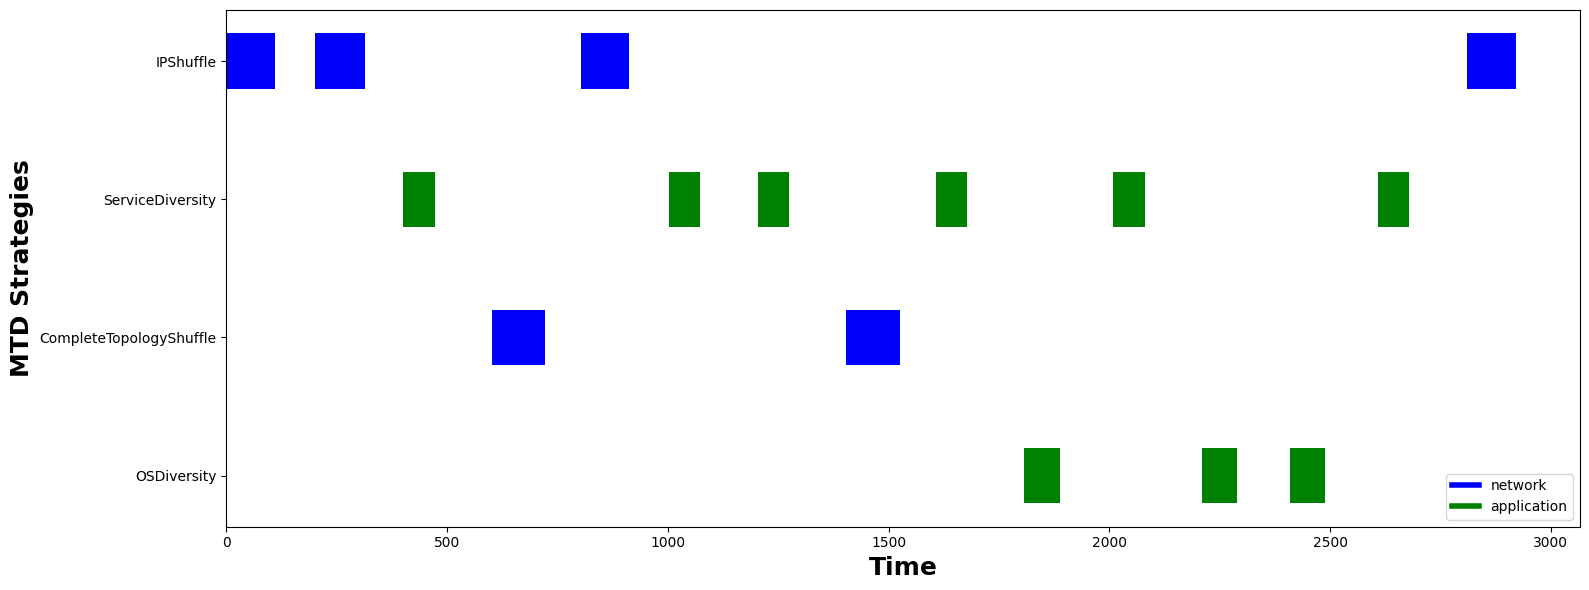

In [507]:
evaluation.visualise_mtd_operation()

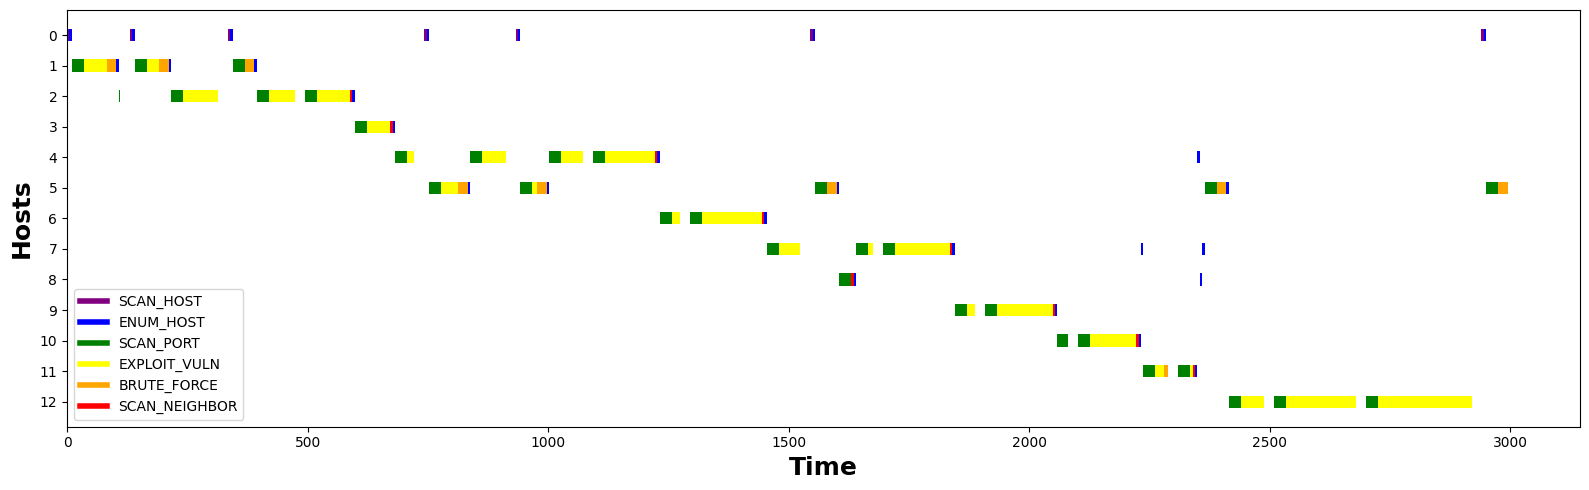

In [508]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  9


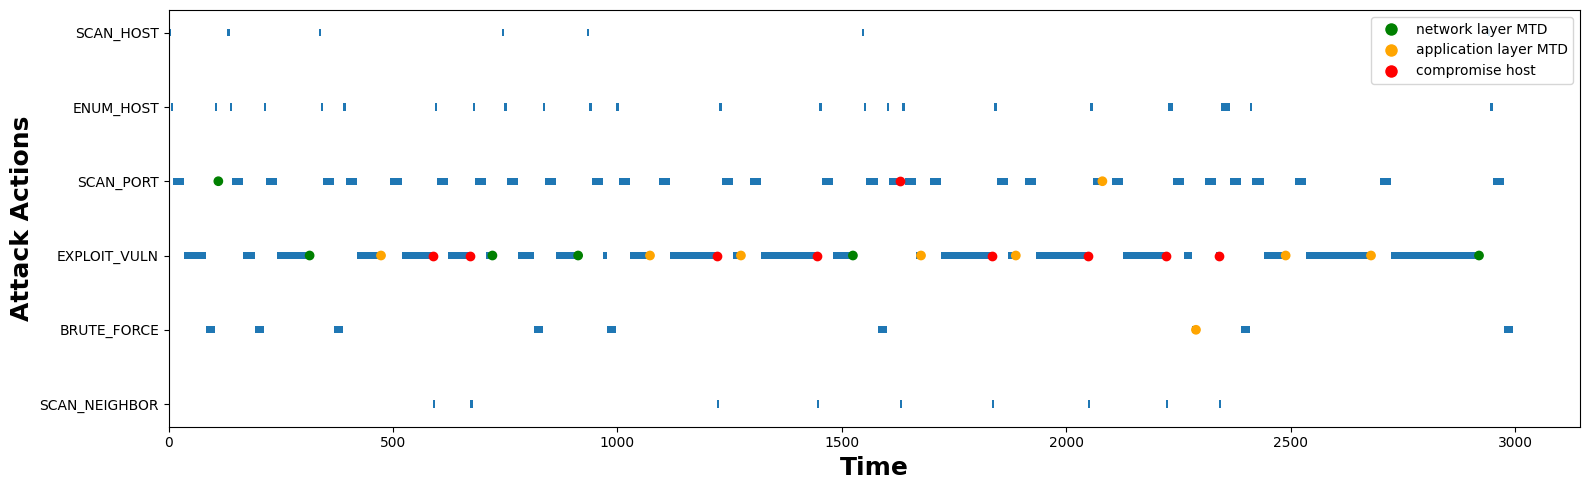

In [509]:
evaluation.visualise_attack_operation()

In [510]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
46,EXPLOIT_VULN,566.873045,587.864576,20.991530,1,0774d357-168c-4c5b-b25b-e14e96aac38a,1,0774d357-168c-4c5b-b25b-e14e96aac38a,3,25,0,"[Dorine, Crysta, Ninette, Viki, Reina]",None,None,yellow,2
58,EXPLOIT_VULN,662.427240,671.931541,9.504302,34,e04713fd-f102-470e-821b-52333955f400,34,e04713fd-f102-470e-821b-52333955f400,1,34,1,"[Adele, Jordan, Keri, Clair, Brandy]",None,None,yellow,3
109,EXPLOIT_VULN,1208.829631,1222.143797,13.314166,25,d130e81d-de3d-4dbd-b6b5-833e96cb6e31,25,d130e81d-de3d-4dbd-b6b5-833e96cb6e31,3,66,2,"[Ysabel, Horatia, Ariela, Joni, Janelle]",None,None,yellow,4
138,EXPLOIT_VULN,1437.112815,1444.643536,7.530721,27,cdfcccdf-cd06-418e-a162-1c8518ef6214,27,cdfcccdf-cd06-418e-a162-1c8518ef6214,1,90,3,"[Birdie, Valera, Daffi, Harrie]",None,None,yellow,6
157,SCAN_PORT,1604.874208,1629.874208,25.000000,35,17904b93-eb21-431c-a79f-411f303dae79,35,17904b93-eb21-431c-a79f-411f303dae79,1,100,4,"[Lucky, Stephie, Katherine, Floris]",None,None,green,8
177,EXPLOIT_VULN,1827.497042,1834.801146,7.304104,28,b106869d-dc96-4f73-9098-4f8f0c06d1a3,28,b106869d-dc96-4f73-9098-4f8f0c06d1a3,2,114,5,"[Sherye, Adelaide, Ebba, Jilli, Adrianne]",None,None,yellow,7
193,EXPLOIT_VULN,2026.651868,2048.664575,22.012707,33,cc4042f4-0b95-47ea-b2b4-e3a27a1cbaa7,33,cc4042f4-0b95-47ea-b2b4-e3a27a1cbaa7,1,125,6,"[Francine, Cammi, Jenine, Kalinda]",None,None,yellow,9
208,EXPLOIT_VULN,2215.235808,2222.537043,7.301235,26,26a462eb-7e82-4d47-8b23-242ef00ffcc4,26,26a462eb-7e82-4d47-8b23-242ef00ffcc4,1,136,7,"[Verna, Steffane, Lilas]",None,None,yellow,10
217,EXPLOIT_VULN,2334.151862,2339.812939,5.661077,29,bf361227-99e9-4e82-ab28-a31447a650af,29,bf361227-99e9-4e82-ab28-a31447a650af,1,139,8,"[Harriett, Carmelina, Feliza, Jeannie]",None,None,yellow,11


In [511]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
157,SCAN_PORT,1604.874208,1629.874208,25.0,35,17904b93-eb21-431c-a79f-411f303dae79,35,17904b93-eb21-431c-a79f-411f303dae79,1,100,4,"[Lucky, Stephie, Katherine, Floris]",None,None,green,8


In [512]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
46,EXPLOIT_VULN,566.873045,587.864576,20.991530,1,0774d357-168c-4c5b-b25b-e14e96aac38a,1,0774d357-168c-4c5b-b25b-e14e96aac38a,3,25,0,"[Dorine, Crysta, Ninette, Viki, Reina]",None,None,yellow,2
58,EXPLOIT_VULN,662.427240,671.931541,9.504302,34,e04713fd-f102-470e-821b-52333955f400,34,e04713fd-f102-470e-821b-52333955f400,1,34,1,"[Adele, Jordan, Keri, Clair, Brandy]",None,None,yellow,3
109,EXPLOIT_VULN,1208.829631,1222.143797,13.314166,25,d130e81d-de3d-4dbd-b6b5-833e96cb6e31,25,d130e81d-de3d-4dbd-b6b5-833e96cb6e31,3,66,2,"[Ysabel, Horatia, Ariela, Joni, Janelle]",None,None,yellow,4
138,EXPLOIT_VULN,1437.112815,1444.643536,7.530721,27,cdfcccdf-cd06-418e-a162-1c8518ef6214,27,cdfcccdf-cd06-418e-a162-1c8518ef6214,1,90,3,"[Birdie, Valera, Daffi, Harrie]",None,None,yellow,6
177,EXPLOIT_VULN,1827.497042,1834.801146,7.304104,28,b106869d-dc96-4f73-9098-4f8f0c06d1a3,28,b106869d-dc96-4f73-9098-4f8f0c06d1a3,2,114,5,"[Sherye, Adelaide, Ebba, Jilli, Adrianne]",None,None,yellow,7
193,EXPLOIT_VULN,2026.651868,2048.664575,22.012707,33,cc4042f4-0b95-47ea-b2b4-e3a27a1cbaa7,33,cc4042f4-0b95-47ea-b2b4-e3a27a1cbaa7,1,125,6,"[Francine, Cammi, Jenine, Kalinda]",None,None,yellow,9
208,EXPLOIT_VULN,2215.235808,2222.537043,7.301235,26,26a462eb-7e82-4d47-8b23-242ef00ffcc4,26,26a462eb-7e82-4d47-8b23-242ef00ffcc4,1,136,7,"[Verna, Steffane, Lilas]",None,None,yellow,10
217,EXPLOIT_VULN,2334.151862,2339.812939,5.661077,29,bf361227-99e9-4e82-ab28-a31447a650af,29,bf361227-99e9-4e82-ab28-a31447a650af,1,139,8,"[Harriett, Carmelina, Feliza, Jeannie]",None,None,yellow,11


In [513]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [514]:
evaluation.evaluation_result_by_compromise_checkpoint()

[]

In [515]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

class Feature:

    def __init__(self, df) -> None:
        # Example parameter for encoding
        self.df, label_encoders = self.encode_text_to_integers(df, ["name", "executed_at", "color"])
        # self.df, scaler = self.normalize_dataframe(self.df)
        
    def normalize_dataframe(self, df, scaler_type='minmax'):
        # Select only numerical columns for normalization
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

        # Exclude columns that were encoded
        encoded_columns = ["name", "executed_at", "color"]
        numerical_columns = [col for col in numerical_columns if col not in encoded_columns]

        if scaler_type == 'minmax':
            scaler = MinMaxScaler()  # Create MinMaxScaler object
        elif scaler_type == 'standard':
            scaler = StandardScaler()  # Create StandardScaler object
        else:
            raise ValueError("Invalid scaler_type. Must be 'minmax' or 'standard'.")

        normalized_data = scaler.fit_transform(df[numerical_columns])  # Fit and transform numerical columns
        df[numerical_columns] = normalized_data  # Update DataFrame with normalized data
        
        return df, scaler

    def encode_text_to_integers(self, df, columns):
        encoded_df = df.copy()  # Create a copy of the DataFrame
        label_encoders = {}  # Dictionary to store LabelEncoders for each column
        
        for column in columns:
            label_encoder = LabelEncoder()  # Create a LabelEncoder for the column
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])  # Encode the column to integers
            label_encoders[column] = label_encoder  # Store the LabelEncoder
            
        return encoded_df, label_encoders


In [516]:
evaluation._mtd_record

,name,start_time,finish_time,duration,executed_at,color
0,IPShuffle,0.000000,110.452256,110.452256,network,blue
1,IPShuffle,200.761165,313.831726,113.070560,network,blue
2,ServiceDiversity,401.050966,472.974484,71.923518,application,green
3,CompleteTopologyShuffle,601.211170,721.261714,120.050544,network,blue
4,IPShuffle,802.096624,912.285482,110.188858,network,blue
5,ServiceDiversity,1002.143539,1072.419444,70.275905,application,green
6,ServiceDiversity,1204.229528,1275.067022,70.837495,application,green
7,CompleteTopologyShuffle,1404.380194,1524.639756,120.259562,network,blue
8,ServiceDiversity,1606.154833,1676.382714,70.227880,application,green
9,OSDiversity,1807.060659,1887.662083,80.601424,application,green


In [517]:
features = Feature(evaluation._mtd_record)

In [518]:
import seaborn as sns

In [519]:
features.df

,name,start_time,finish_time,duration,executed_at,color
0,1,0.000000,110.452256,110.452256,1,0
1,1,200.761165,313.831726,113.070560,1,0
2,3,401.050966,472.974484,71.923518,0,1
3,0,601.211170,721.261714,120.050544,1,0
4,1,802.096624,912.285482,110.188858,1,0
5,3,1002.143539,1072.419444,70.275905,0,1
6,3,1204.229528,1275.067022,70.837495,0,1
7,0,1404.380194,1524.639756,120.259562,1,0
8,3,1606.154833,1676.382714,70.227880,0,1
9,2,1807.060659,1887.662083,80.601424,0,1


In [520]:
features.df.corr()

,name,start_time,finish_time,duration,executed_at,color
name,1.000000,0.269847,0.249304,-0.973249,-0.901127,0.901127
start_time,0.269847,1.000000,0.999762,-0.361325,-0.409718,0.409718
finish_time,0.249304,0.999762,1.000000,-0.340908,-0.390277,0.390277
duration,-0.973249,-0.361325,-0.340908,1.000000,0.975239,-0.975239
executed_at,-0.901127,-0.409718,-0.390277,0.975239,1.000000,-1.000000
color,0.901127,0.409718,0.390277,-0.975239,-1.000000,1.000000


<Axes: >

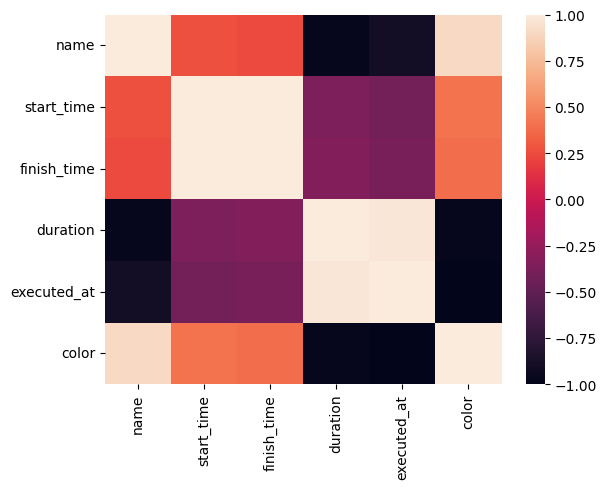

In [521]:
sns.heatmap(features.df.corr())

In [522]:
evaluation._attack_record

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,purple,0
1,ENUM_HOST,5.000000,10.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,blue,0
2,SCAN_PORT,10.000000,35.000000,25.000000,0,12f9eab3-d028-4653-aa78-b91c4821dd60,None,None,1,0,0,[],None,None,green,1
3,EXPLOIT_VULN,35.000000,36.362495,1.362495,0,12f9eab3-d028-4653-aa78-b91c4821dd60,None,None,1,0,0,[],None,None,yellow,1
4,EXPLOIT_VULN,36.362495,38.775184,2.412690,0,12f9eab3-d028-4653-aa78-b91c4821dd60,None,None,1,1,0,[],None,None,yellow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,EXPLOIT_VULN,2919.690422,2919.922542,0.232120,41,08d4ce71-86d2-4815-81c9-548d13c21bfe,None,None,1,192,9,[],network,IPShuffle,yellow,12
284,SCAN_HOST,2940.229799,2945.229799,5.000000,-1,-1,None,None,0,192,9,[],None,None,purple,0
285,ENUM_HOST,2945.229799,2950.229799,5.000000,-1,-1,None,None,0,192,9,[],None,None,blue,0
286,SCAN_PORT,2950.229799,2975.229799,25.000000,31,7196fd14-dcfe-4bc5-94e9-d8d26778882c,None,None,5,192,9,[],None,None,green,5


In [523]:
evaluation._attack_record[['name', 'start_time', 'finish_time', 'duration', 'compromise_host',"compromise_host_uuid"]][evaluation._attack_record['compromise_host'] != "None"]

,name,start_time,finish_time,duration,compromise_host,compromise_host_uuid
46,EXPLOIT_VULN,566.873045,587.864576,20.991530,1,0774d357-168c-4c5b-b25b-e14e96aac38a
58,EXPLOIT_VULN,662.427240,671.931541,9.504302,34,e04713fd-f102-470e-821b-52333955f400
109,EXPLOIT_VULN,1208.829631,1222.143797,13.314166,25,d130e81d-de3d-4dbd-b6b5-833e96cb6e31
138,EXPLOIT_VULN,1437.112815,1444.643536,7.530721,27,cdfcccdf-cd06-418e-a162-1c8518ef6214
157,SCAN_PORT,1604.874208,1629.874208,25.000000,35,17904b93-eb21-431c-a79f-411f303dae79
177,EXPLOIT_VULN,1827.497042,1834.801146,7.304104,28,b106869d-dc96-4f73-9098-4f8f0c06d1a3
193,EXPLOIT_VULN,2026.651868,2048.664575,22.012707,33,cc4042f4-0b95-47ea-b2b4-e3a27a1cbaa7
208,EXPLOIT_VULN,2215.235808,2222.537043,7.301235,26,26a462eb-7e82-4d47-8b23-242ef00ffcc4
217,EXPLOIT_VULN,2334.151862,2339.812939,5.661077,29,bf361227-99e9-4e82-ab28-a31447a650af


In [524]:
evaluation._attack_record.columns

Index(['name', 'start_time', 'finish_time', 'duration', 'current_host',
       'current_host_uuid', 'compromise_host', 'compromise_host_uuid',
       'current_host_attempt', 'cumulative_attempts',
       'cumulative_compromised_hosts', 'compromise_users', 'interrupted_in',
       'interrupted_by', 'color', 'curr_host_token'],
      dtype='object')